In [ ]:
# 모듈가져오기
import warnings
# 경고 무시 처리
warnings.filterwarnings('ignore')

# 기본
import numpy as np
import pandas as pd

# 예측용
from fbprophet import Prophet
# 시간처리
from datetime import datetime

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline\

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 한글 처리 (구글링)
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
path = '/content/drive/My Drive/data_project'

In [ ]:
re_hit_main = pd.read_csv( path + '/은경s/kbreport_hit_main.csv', sep=',', encoding='cp949' )
re_hit_main = re_hit_main.drop(['Unnamed: 0', '기대승률', 'WAR', 'wOBA'], axis = 1)
re_hit_main['승률'][re_hit_main['승률']=='-'] = '0'
re_hit_main['승률'] = re_hit_main['승률'].map(lambda x : float(x))
rank_month = re_hit_main.iloc[:,:9]

In [ ]:
re_hit_final = pd.read_csv(path + '/성훈s/kbreport_hit_final.csv', encoding='cp949')
re_hit_final = re_hit_final.drop('Unnamed: 0', axis = 1)
re_hit_final

,연도,월,팀명,R/G,출루율,장타율,OPS,볼/삼,ISO,RC/27,도실
0,2015,3,롯데,8.00,0.415,0.525,0.940,0.61,0.222,8.48,0.413
1,2015,3,두산,6.50,0.352,0.516,0.868,1.20,0.219,6.44,0.372
2,2015,3,KIA,5.00,0.380,0.550,0.930,1.29,0.267,7.82,0.402
3,2015,3,삼성,5.67,0.379,0.469,0.848,0.67,0.150,7.36,0.379
4,2015,3,한화,4.50,0.385,0.351,0.736,0.81,0.094,5.18,0.348
...,...,...,...,...,...,...,...,...,...,...,...
405,2020,7,삼성,5.84,0.378,0.452,0.830,0.56,0.142,6.06,0.371
406,2020,7,롯데,5.40,0.354,0.413,0.767,0.58,0.132,5.09,0.346
407,2020,7,LG,5.50,0.338,0.420,0.758,0.50,0.157,4.97,0.339
408,2020,7,Hero,4.86,0.354,0.416,0.770,0.57,0.142,5.27,0.346


In [ ]:
df = pd.merge(rank_month, re_hit_final, on=['연도','월','팀명'])
df.shape

(410, 17)

In [ ]:
rank_season = pd.read_csv(path + '/성훈s/rank_season.csv', encoding='cp949')
rank_season = rank_season.drop('Unnamed: 0', axis = 1)
rank_season

,연도,순위,팀명
0,2015,1,두산
1,2015,2,삼성
2,2015,3,NC
3,2015,4,키움
4,2015,5,SK
5,2015,6,한화
6,2015,7,KIA
7,2015,8,롯데
8,2015,9,LG
9,2015,10,KT


In [ ]:
tmp = rank_season[rank_season['팀명'] == '롯데']

In [ ]:
rank_season['팀명'].unique()

array(['두산', '삼성', 'NC', '키움', 'SK', '한화', 'KIA', '롯데', 'LG', 'KT'],
      dtype=object)

In [ ]:
colors = dict(zip( ['두산', '삼성', 'NC', '키움', 'SK', '한화', 'KIA', '롯데', 'LG', 'KT', 'Hero'], ['#131230','#074CA1','#315288','#820024','#FF0000','#FF6600','#C70125','#002955','#C30452','#000000','#820024']))

In [ ]:
colors

{'Hero': '##820024',
 'KIA': '#C70125',
 'KT': '#000000',
 'LG': '#C30452',
 'NC': '#315288',
 'SK': '#FF0000',
 '두산': '#131230',
 '롯데': '#002955',
 '삼성': '#074CA1',
 '키움': '#820024',
 '한화': '#FF6600'}

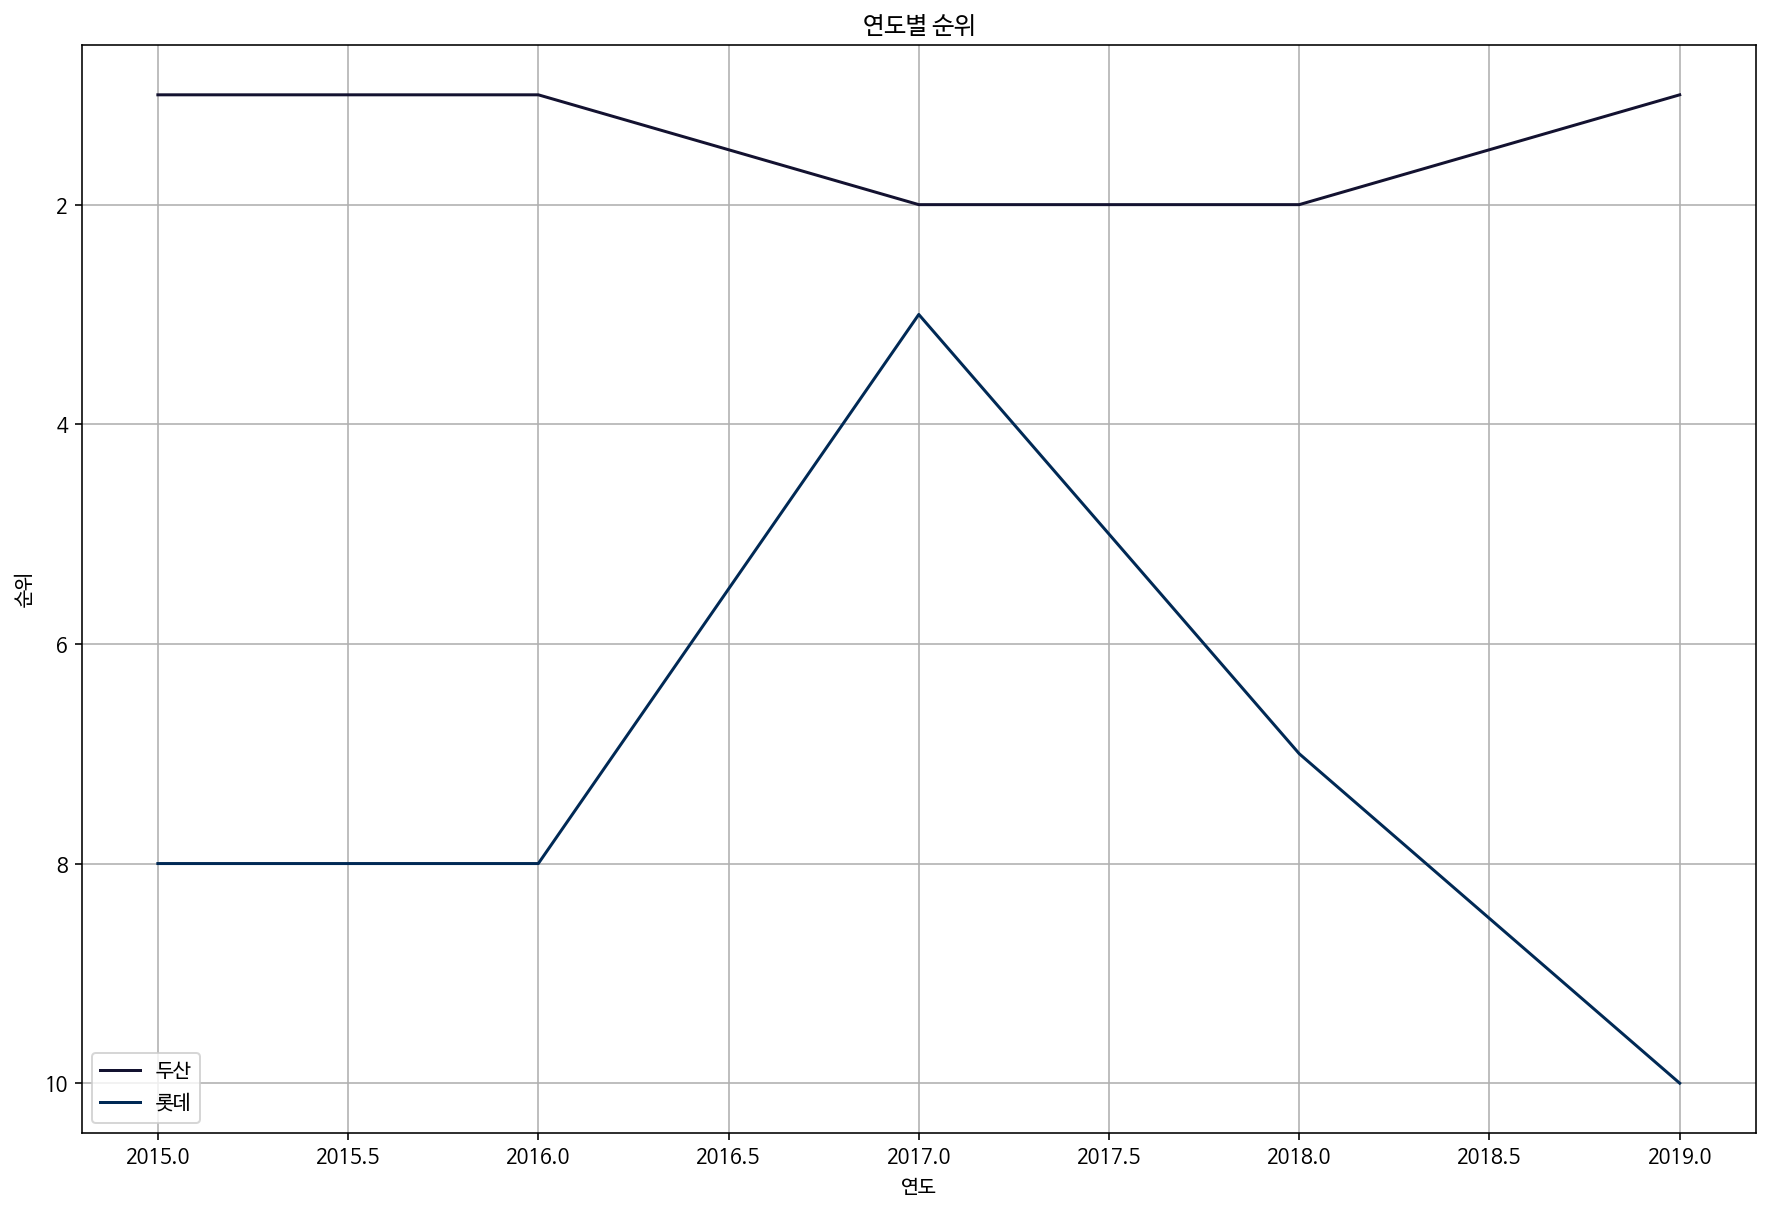

In [ ]:
plt.figure(figsize=(15,10))
for name in ['두산','롯데']:
  tmp = rank_season[rank_season['팀명'] == name]
  plt.plot(tmp['연도'], tmp['순위'], color=colors[name])
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel('연도')
plt.ylabel('순위')
plt.title('연도별 순위')
plt.legend(['두산','롯데'])
plt.show()

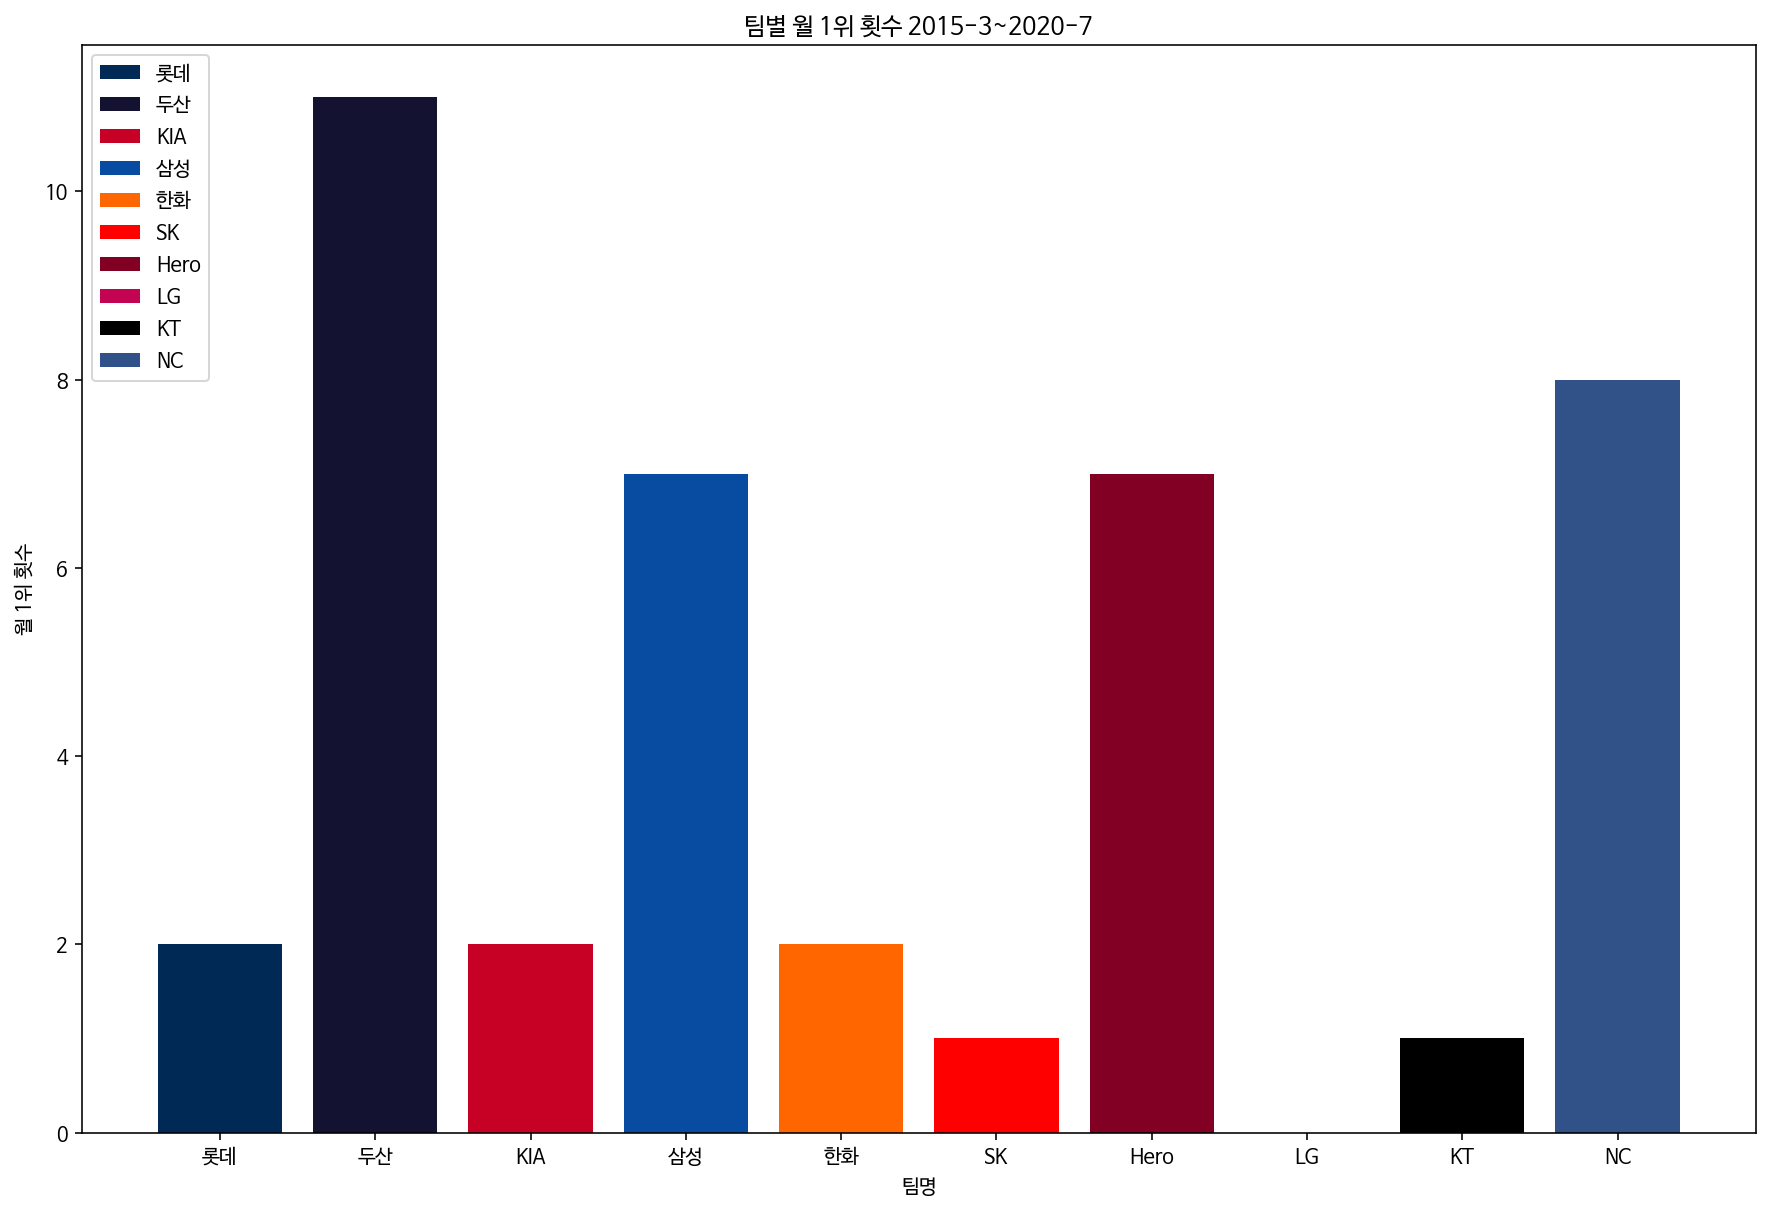

In [ ]:
plt.figure(figsize=(15,10))
for name in rank_month['팀명'].unique():
  tmp = rank_month[rank_month['팀명']==name]
  plt.bar(name, len(tmp[tmp['순위']==1]), color=colors[name])
plt.legend(rank_month['팀명'].unique())
plt.xlabel('팀명')
plt.ylabel('월 1위 횟수')
plt.title('팀별 월 1위 횟수 2015-3~2020-7')
plt.show()

In [ ]:
names = list(rank_month['팀명'].unique())
count = list()
for name in names:
  tmp = rank_month[rank_month['팀명']==name]
  count.append(len(tmp[tmp['순위']==1]))

In [ ]:
names

['롯데', '두산', 'KIA', '삼성', '한화', 'SK', 'Hero', 'LG', 'KT', 'NC']

In [ ]:
count

[2, 11, 2, 7, 2, 1, 7, 0, 1, 8]

In [ ]:
apex_count = pd.DataFrame({'팀명':names, '월1위횟수':count})
apex_count

,팀명,월1위횟수
0,롯데,2
1,두산,11
2,KIA,2
3,삼성,7
4,한화,2
5,SK,1
6,Hero,7
7,LG,0
8,KT,1
9,NC,8
